# BREAST Cancer - PCA - Classification

In [1]:
#Import packages
import pandas as pd
import numpy as np

#import xgboost
from xgboost import XGBClassifier

#import sklearn 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import *
from sklearn import metrics

import shap

import os

import  warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Preprocessing of data 

### Load data and Declare feature vector and target variable

In [2]:
df = pd.read_csv("/Users/justine_labory/Desktop/github/plantnet/Metabolomic_project/breast_project/data/BREAST_PCA.ON.ALL.Feat.csv")
X=df.drop("Label", axis=1)
y=df["Label"]

In [3]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
0,-1.770275,-0.741787,2.923962,-2.111043,1.824694,2.416383,0.853641,-1.470400,-0.659628,0.044602,...,0.178397,-0.768133,-1.601146,-0.074388,0.171509,-0.475816,-0.601019,0.207284,0.231249,0.200532
1,-12.925876,1.024154,-1.692970,-3.226751,0.076626,0.153500,2.233854,-0.920498,-0.970724,-0.188539,...,0.411262,1.542571,-0.437854,0.386997,-0.784703,0.384537,-0.111803,0.106091,0.387665,-1.196551
2,4.559114,-2.891029,2.110247,-1.715190,-2.638680,0.557337,1.772302,-1.345708,-0.763544,-0.807866,...,-0.234127,-0.553171,0.757631,0.446520,0.721931,-0.172545,0.223632,-0.232124,0.193070,-0.091013
3,-14.484943,0.338302,0.379772,-3.344510,-5.678605,-1.245975,-2.451500,0.082311,-1.839653,0.372843,...,0.673299,1.149619,0.050618,-1.905874,0.953184,-0.171947,0.514350,-0.344800,0.566613,0.645994
4,4.458548,-3.340455,1.732509,0.960669,0.349213,3.496288,2.202506,2.690526,0.148798,0.948111,...,-0.671140,-0.602199,0.336214,-0.518585,0.210888,-0.080873,-0.314629,-0.366528,0.022076,-0.071527


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

### Run XGBoost model with cross validation

In [5]:
# Define the number of splits and the number of repeats
n_splits = 4
n_repeats = 5

[[11  6]
 [ 8 43]]
0.7941176470588235
0.7450980392156863
0.86
0.8775510204081632
0.8431372549019608
0.7923875432525951


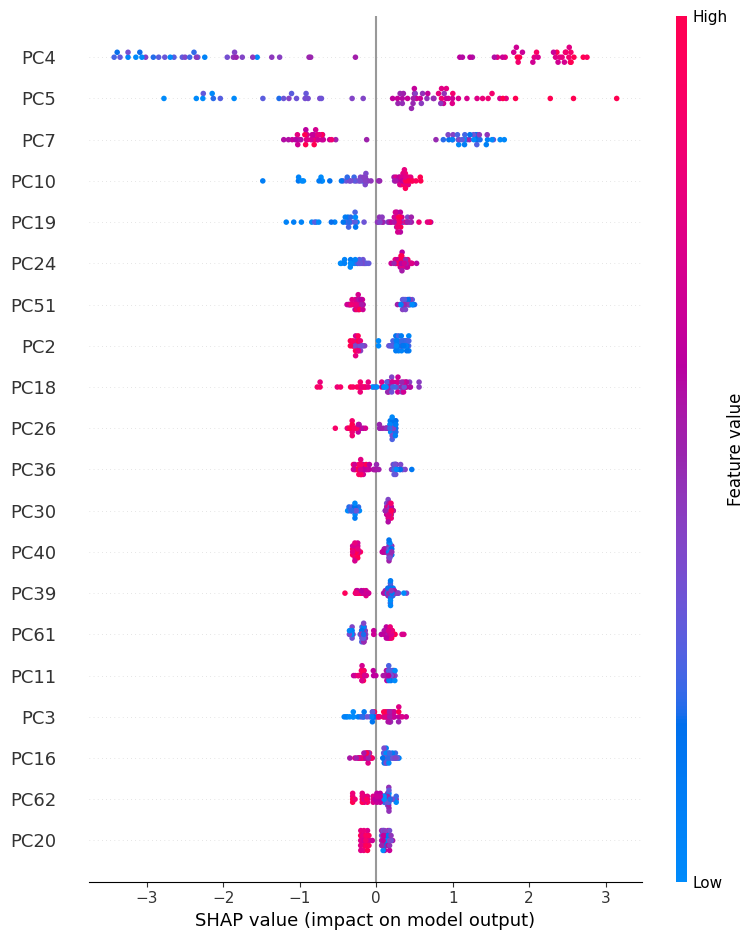

[[ 8  9]
 [ 2 49]]
0.8382352941176471
0.7156862745098039
0.8990825688073395
0.8448275862068966
0.9607843137254902
0.8546712802768166


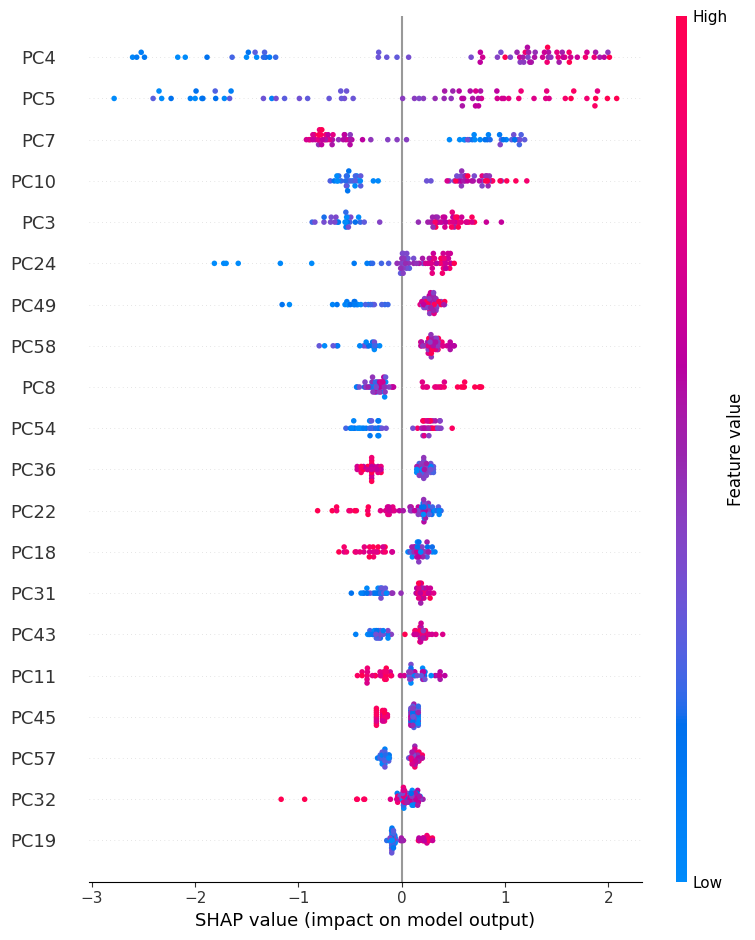

[[ 9  8]
 [ 3 48]]
0.8382352941176471
0.7352941176470589
0.897196261682243
0.8571428571428571
0.9411764705882353
0.7923875432525951


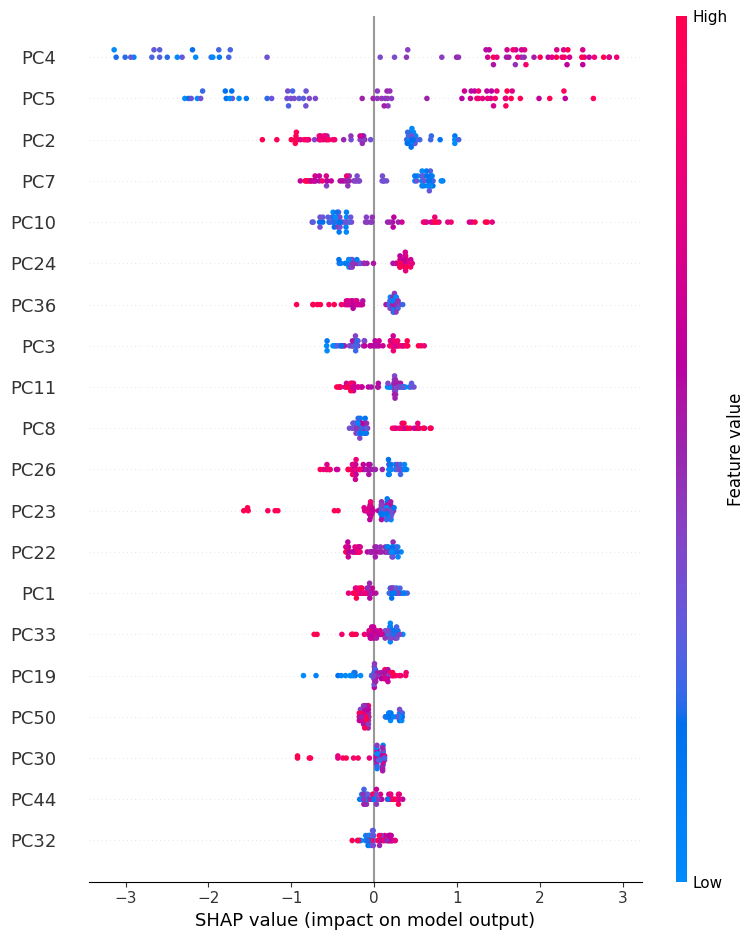

[[ 9  7]
 [ 1 50]]
0.8805970149253731
0.7714460784313726
0.9259259259259259
0.8771929824561403
0.9803921568627451
0.9105392156862745


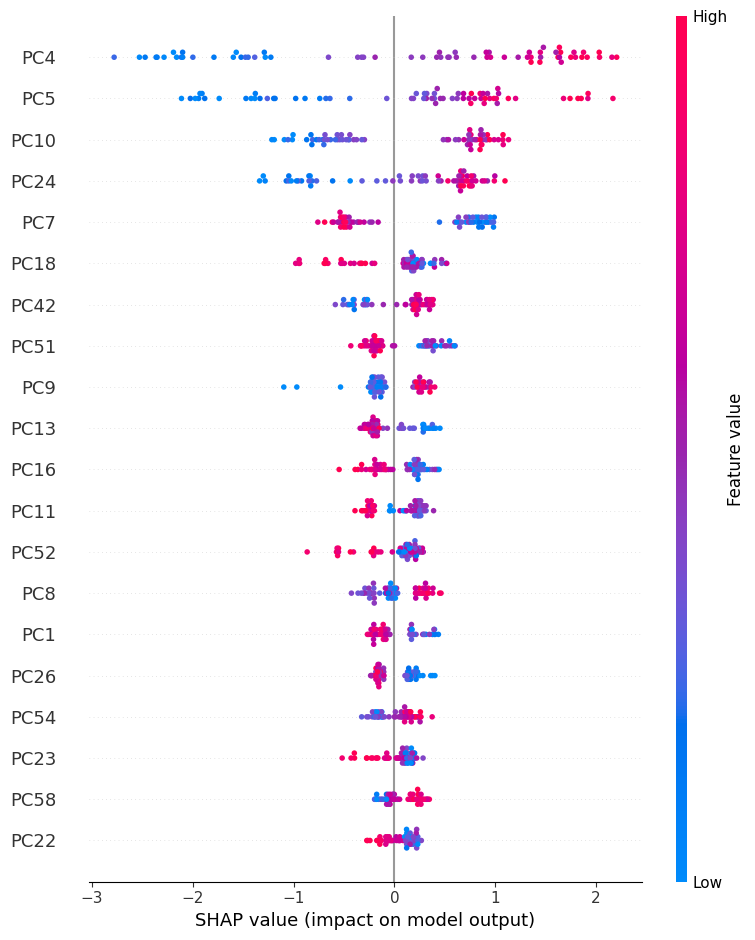

[[ 9  8]
 [ 5 46]]
0.8088235294117647
0.7156862745098039
0.8761904761904761
0.8518518518518519
0.9019607843137255
0.8385236447520183


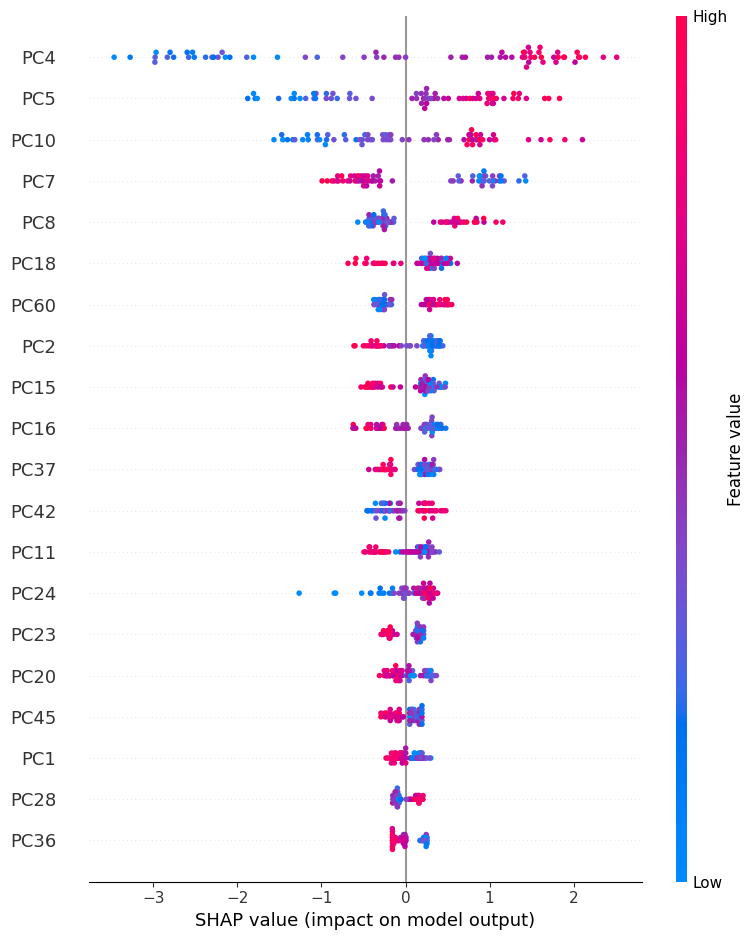

[[ 9  8]
 [ 1 50]]
0.8676470588235294
0.7549019607843137
0.9174311926605505
0.8620689655172413
0.9803921568627451
0.8662053056516724


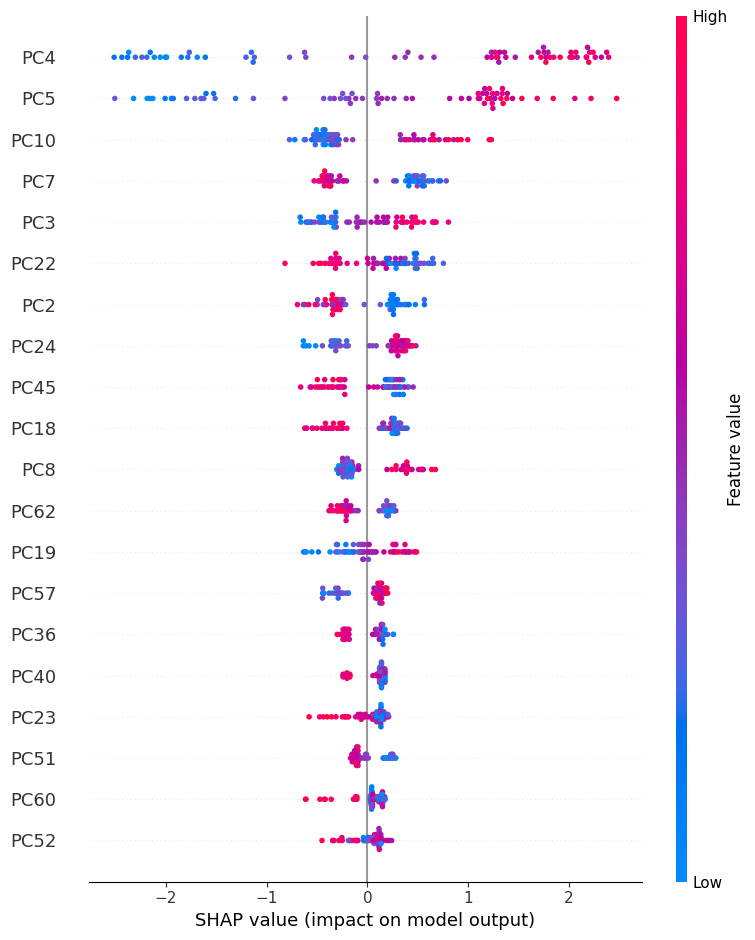

[[ 9  8]
 [ 2 49]]
0.8529411764705882
0.7450980392156863
0.9074074074074074
0.8596491228070176
0.9607843137254902
0.8212226066897348


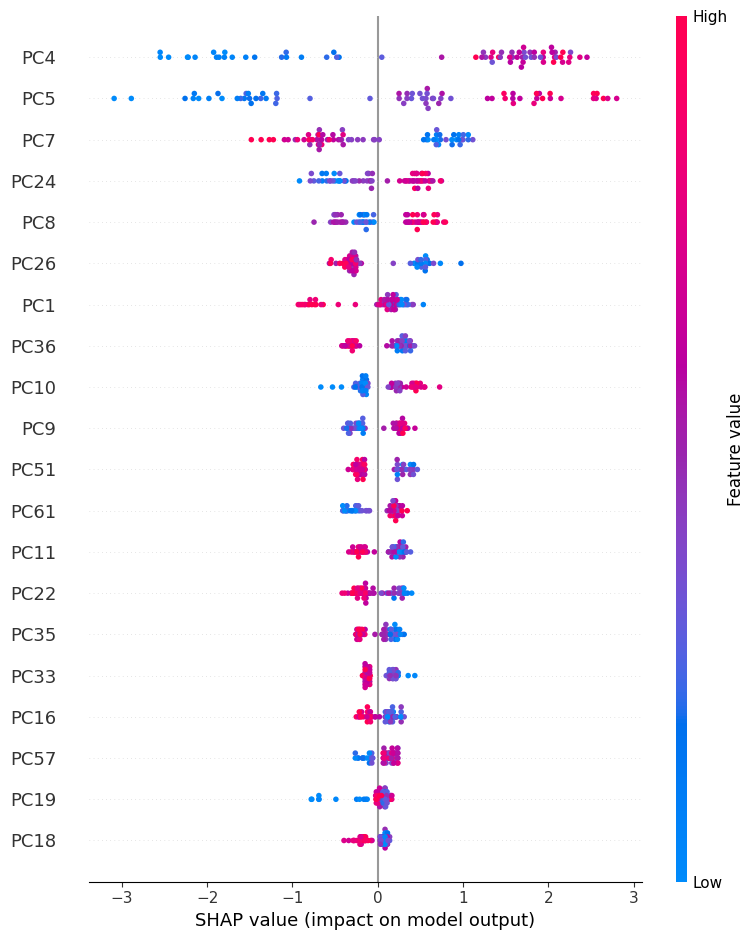

[[ 7  9]
 [ 2 49]]
0.835820895522388
0.6991421568627452
0.8990825688073395
0.8448275862068966
0.9607843137254902
0.8480392156862745


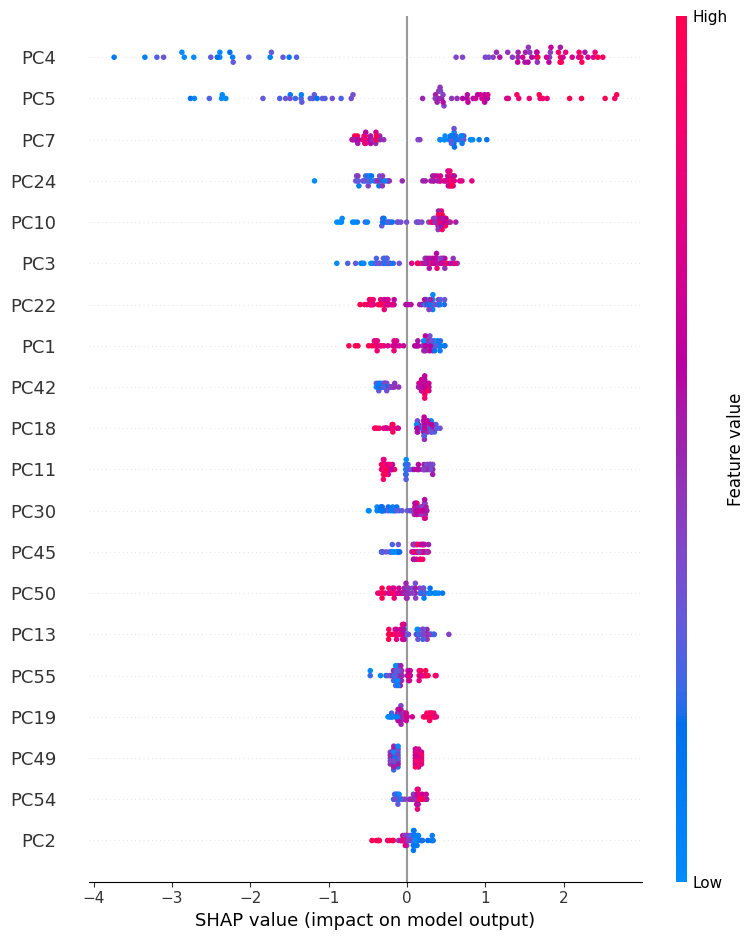

[[12  5]
 [ 3 48]]
0.8823529411764706
0.8235294117647058
0.923076923076923
0.9056603773584906
0.9411764705882353
0.9250288350634371


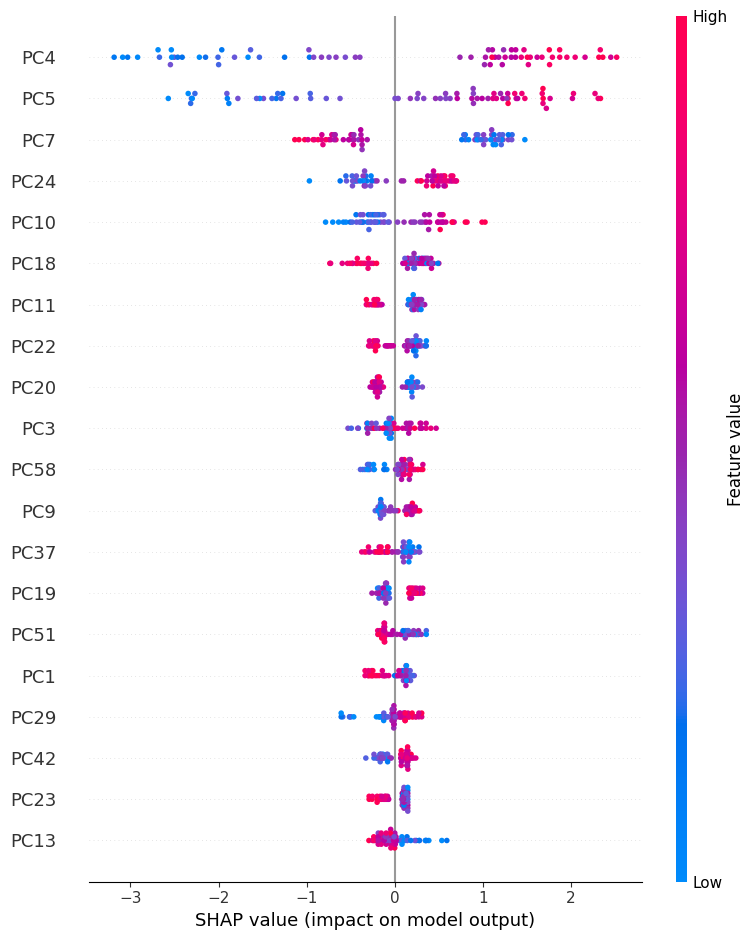

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.845444059976932


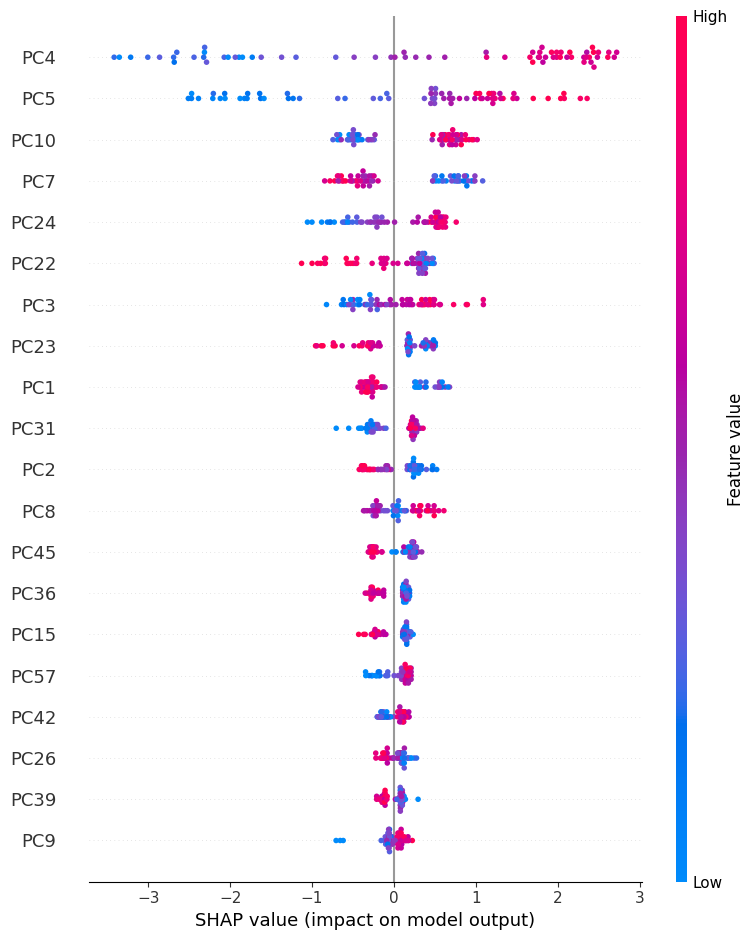

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.8166089965397925


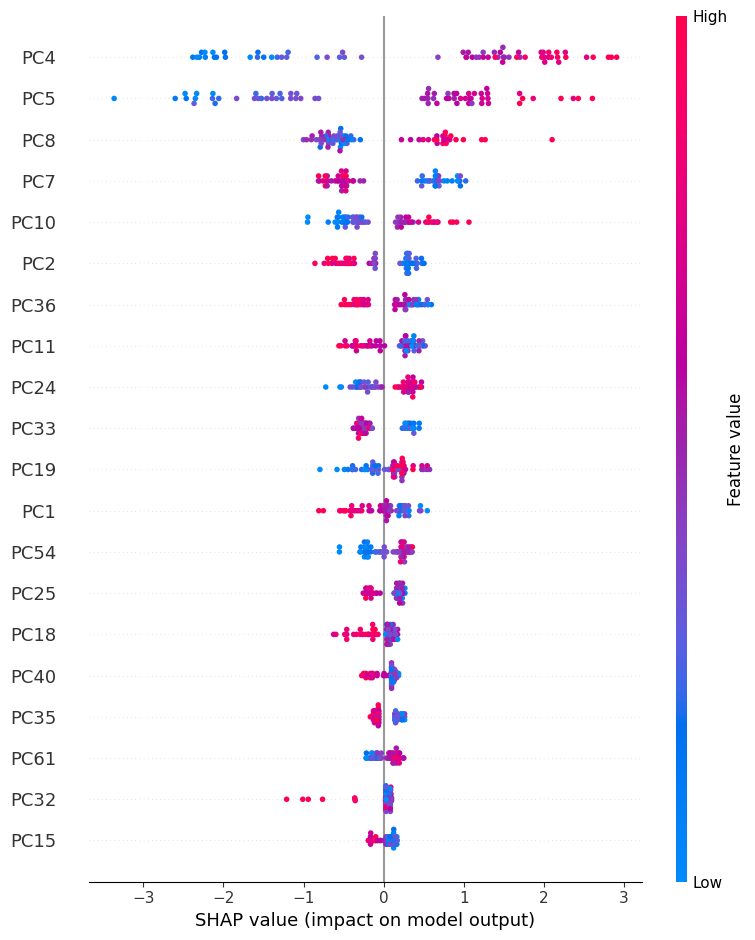

[[ 7  9]
 [ 1 50]]
0.8507462686567164
0.7089460784313726
0.909090909090909
0.847457627118644
0.9803921568627451
0.8468137254901961


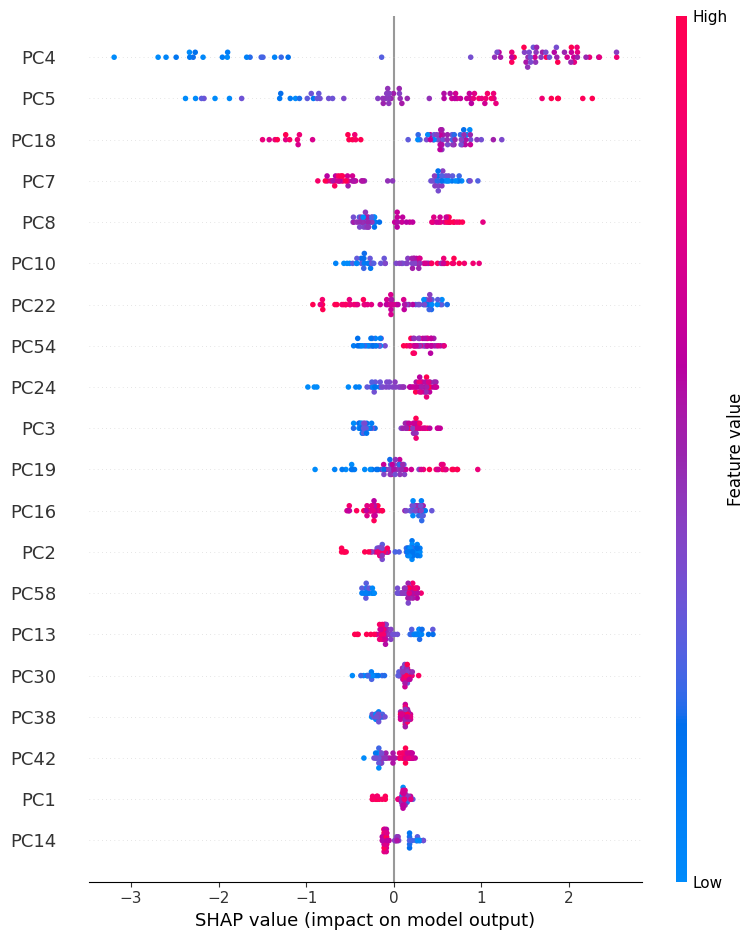

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.8269896193771626


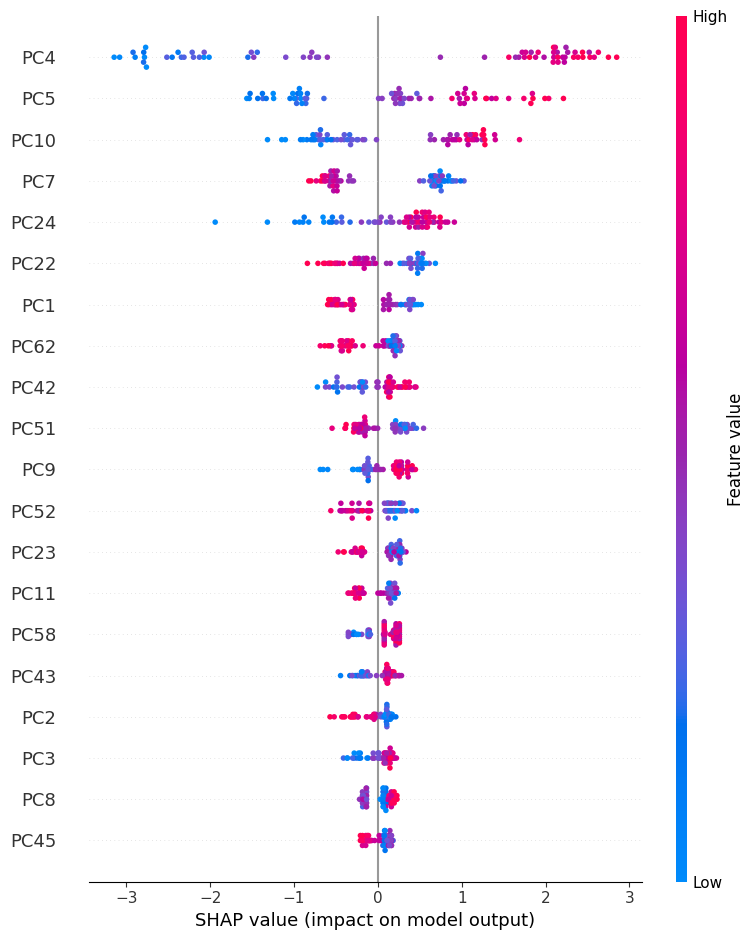

[[11  6]
 [ 6 45]]
0.8235294117647058
0.7647058823529411
0.8823529411764706
0.8823529411764706
0.8823529411764706
0.8638985005767013


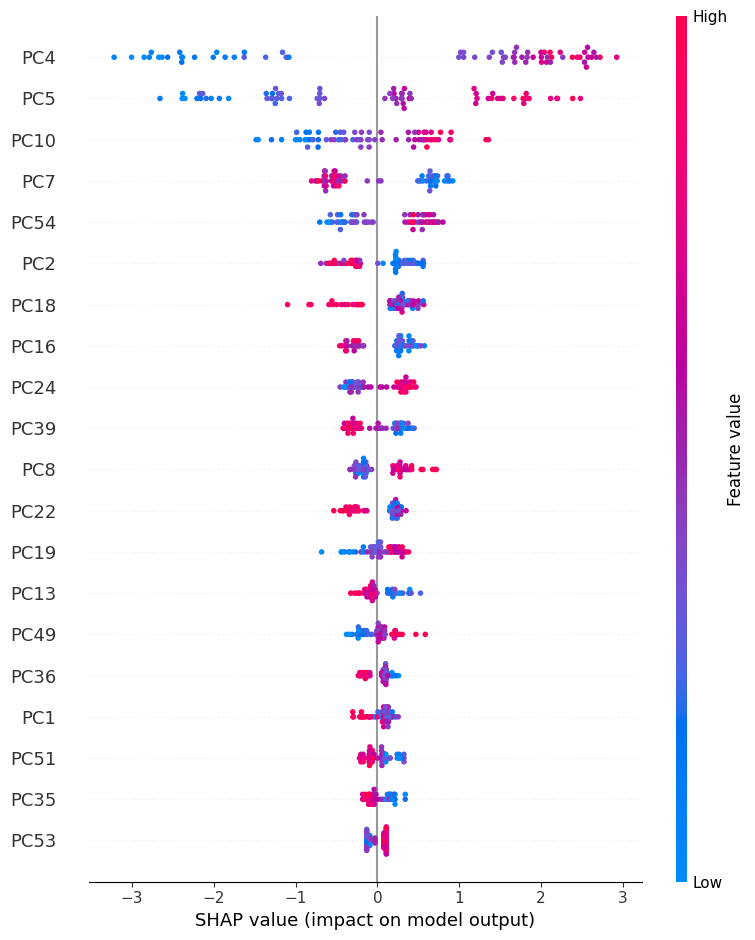

[[ 7 10]
 [ 1 50]]
0.8382352941176471
0.696078431372549
0.9009009009009009
0.8333333333333334
0.9803921568627451
0.8119953863898501


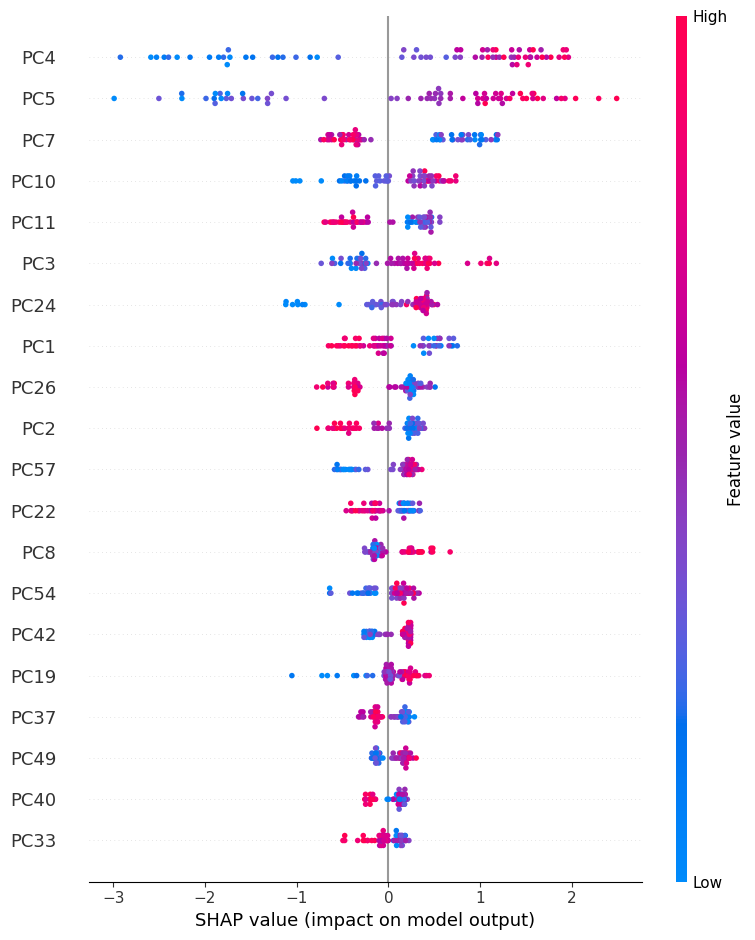

[[ 8  8]
 [ 2 49]]
0.8507462686567164
0.7303921568627452
0.9074074074074074
0.8596491228070176
0.9607843137254902
0.8480392156862745


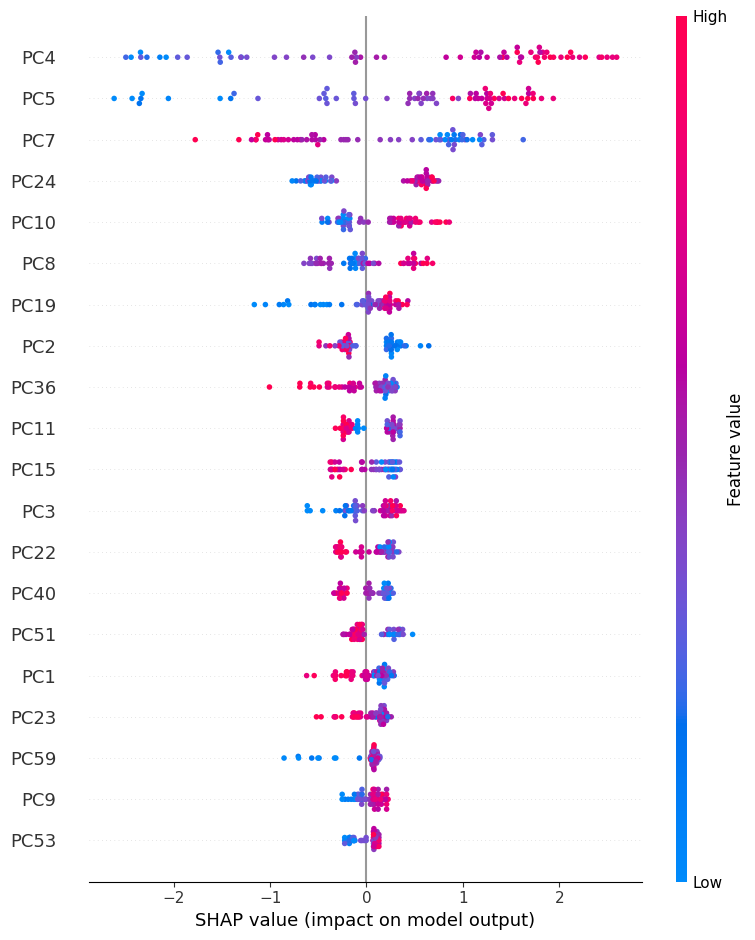

[[ 8  9]
 [ 0 51]]
0.8676470588235294
0.7352941176470589
0.9189189189189189
0.85
1.0
0.8592848904267589


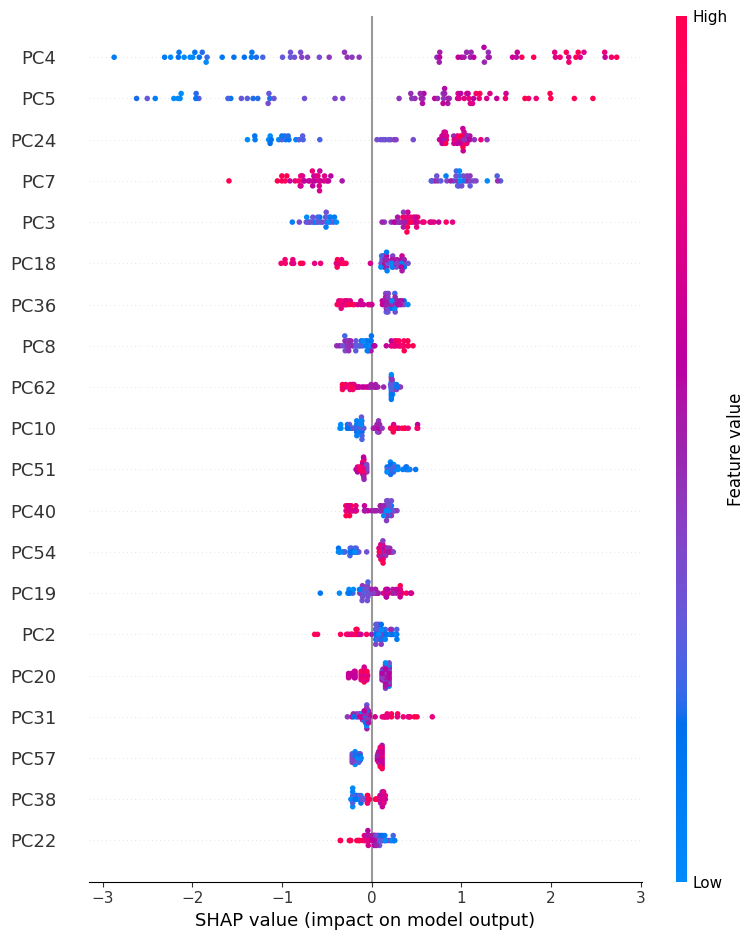

[[11  6]
 [ 2 49]]
0.8823529411764706
0.803921568627451
0.9245283018867925
0.8909090909090909
0.9607843137254902
0.8742791234140715


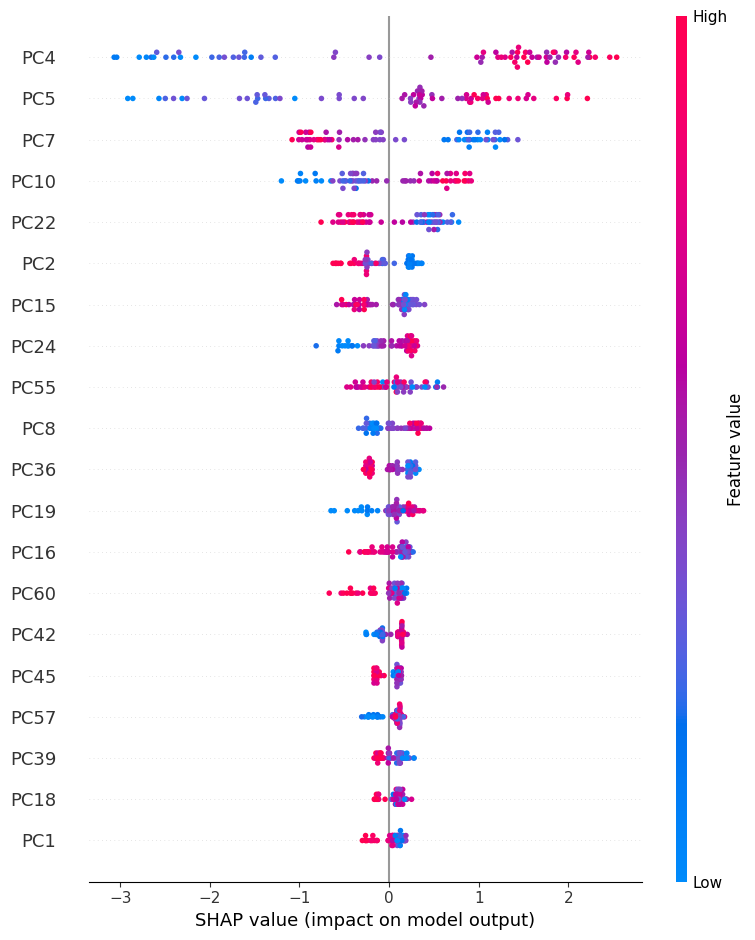

[[ 8  9]
 [ 3 48]]
0.8235294117647058
0.7058823529411764
0.8888888888888888
0.8421052631578947
0.9411764705882353
0.8638985005767013


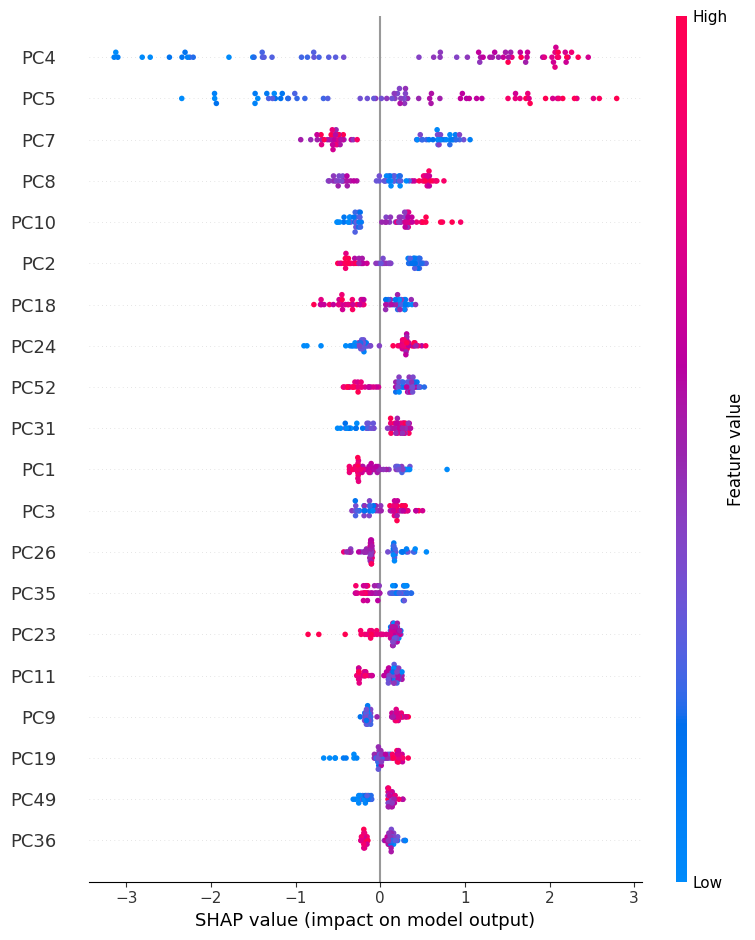

[[ 6 10]
 [ 5 46]]
0.7761194029850746
0.6384803921568627
0.8598130841121495
0.8214285714285714
0.9019607843137255
0.8125


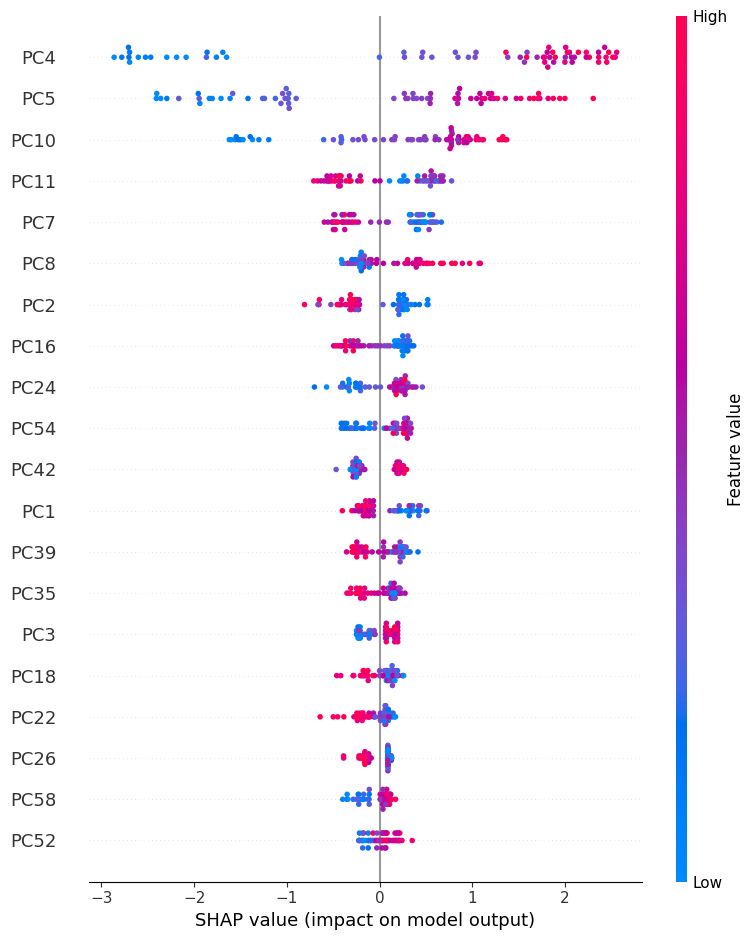

In [6]:
rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)

df_metrics = pd.DataFrame(columns=['accuracy', 'balanced_accuracy', 'precision', 'recall', 'f1score',
                                   'roc_auc', 'specificity'],
                         index = ['fold' + str(x) for x in range(1,(n_splits*n_repeats +1))])


for i, (train_index, test_index) in enumerate(rkf.split(X,y)):
    
    X_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    X_test=X.iloc[test_index]
    y_test=y.iloc[test_index]


    xgboost = XGBClassifier(seed=1234)

    xgboost = xgboost.fit(X_train,y_train)
    y_pred_proba = xgboost.predict_proba(X_test)[:,1]
    # # Get predicted probability
    y_pred = xgboost.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]
    
    acc = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1score = metrics.f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    spe= tn / (tn + fp)
    
    # Fill in the dataframe with metrics
    df_metrics.iloc[i] = [acc, bal_acc, f1score, precision, recall, roc_auc, spe]
    
    print(acc)
    print(bal_acc)
    print(f1score)
    print(precision)
    print(recall)
    print(roc_auc)

#     Add feature importance with SHAP

    explainer = shap.TreeExplainer(xgboost)
    shap_values = explainer.shap_values(X_test)
    #shap.summary_plot(shap_values, X_test, plot_type="bar")
    shap.summary_plot(shap_values, X_test)

In [7]:
df_metrics

,accuracy,balanced_accuracy,precision,recall,f1score,roc_auc,specificity
fold1,0.794118,0.745098,0.86,0.877551,0.843137,0.792388,0.647059
fold2,0.838235,0.715686,0.899083,0.844828,0.960784,0.854671,0.470588
fold3,0.838235,0.735294,0.897196,0.857143,0.941176,0.792388,0.529412
fold4,0.880597,0.771446,0.925926,0.877193,0.980392,0.910539,0.5625
fold5,0.808824,0.715686,0.87619,0.851852,0.901961,0.838524,0.529412
fold6,0.867647,0.754902,0.917431,0.862069,0.980392,0.866205,0.529412
fold7,0.852941,0.745098,0.907407,0.859649,0.960784,0.821223,0.529412
fold8,0.835821,0.699142,0.899083,0.844828,0.960784,0.848039,0.4375
fold9,0.882353,0.823529,0.923077,0.90566,0.941176,0.925029,0.705882
fold10,0.882353,0.803922,0.924528,0.890909,0.960784,0.845444,0.647059


## Compute mean and standard deviation of metrics

In [8]:
print(f'The mean accuracy is: {np.mean(df_metrics["accuracy"])*100:.1f} (±{np.std(df_metrics["accuracy"])*100:.1f}) ')
print(f'The mean balanced accuracy is: {np.mean(df_metrics["balanced_accuracy"])*100:.1f} (±{np.std(df_metrics["balanced_accuracy"])*100:.1f}) ')
print(f'The mean precision is: {np.mean(df_metrics["precision"])*100:.1f} (±{np.std(df_metrics["precision"])*100:.1f}) ')
print(f'The mean recall is: {np.mean(df_metrics["recall"])*100:.1f} (±{np.std(df_metrics["recall"])*100:.1f}) ')
print(f'The mean F1 score is: {np.mean(df_metrics["f1score"])*100:.1f} (±{np.std(df_metrics["f1score"])*100:.1f}) ')
print(f'The mean ROC AUC is: {np.mean(df_metrics["roc_auc"])*100:.1f} (±{np.std(df_metrics["roc_auc"])*100:.1f}) ')
print(f'The mean specificity is: {np.mean(df_metrics["specificity"])*100:.1f} (±{np.std(df_metrics["specificity"])*100:.1f}) ')

The mean accuracy is: 84.8 (±3.1) 
The mean balanced accuracy is: 74.5 (±4.6) 
The mean precision is: 90.4 (±2.1) 
The mean recall is: 86.4 (±2.2) 
The mean F1 score is: 94.8 (±3.7) 
The mean ROC AUC is: 84.6 (±3.3) 
The mean specificity is: 54.2 (±9.4) 


## Compute 95% CI

In [9]:
acc_ci= np.percentile(df_metrics["accuracy"], [2.5,97.5])
bal_acc_ci= np.percentile(df_metrics["balanced_accuracy"], [2.5,97.5])
precision_ci = np.percentile(df_metrics["precision"], [2.5,97.5])
recall_ci= np.percentile(df_metrics["recall"], [2.5,97.5])
f1_ci = np.percentile(df_metrics["f1score"], [2.5,97.5])
roc_auc_ci = np.percentile(df_metrics["roc_auc"], [2.5,97.5])
specificity_ci = np.percentile(df_metrics['specificity'], [2.5,97.5])

print(f'The confidence interval for accuracy is [{acc_ci[0]*100:.1f} ; {acc_ci[1]*100:.1f}]')
print(f'The confidence interval for balanced accucary is [{bal_acc_ci[0]*100:.1f} ; {bal_acc_ci[1]*100:.1f}]')
print(f'The confidence interval for precision is [{precision_ci[0]*100:.1f} ; {precision_ci[1]*100:.1f}]')
print(f'The confidence interval for recall is [{recall_ci[0]*100:.1f} ; {recall_ci[1]*100:.1f}]')
print(f'The confidence interval for F1 score is [{f1_ci[0]*100:.1f} ; {f1_ci[1]*100:.1f}]')
print(f'The confidence interval for ROC AUC score is [{roc_auc_ci[0]*100:.1f} ; {roc_auc_ci[1]*100:.1f}]')
print(f'The confidence interval for specificity score is [{specificity_ci[0]*100:.1f} ; {specificity_ci[1]*100:.1f}]')

The confidence interval for accuracy is [78.5 ; 88.2]
The confidence interval for balanced accucary is [66.6 ; 81.4]
The confidence interval for precision is [86.0 ; 92.5]
The confidence interval for recall is [82.7 ; 89.9]
The confidence interval for F1 score is [86.2 ; 99.1]
The confidence interval for ROC AUC score is [79.2 ; 91.8]
The confidence interval for specificity score is [39.2 ; 67.8]
